# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
training_file = ('./traffic-signs-data/train.p')
validation_file = ('./traffic-signs-data/valid.p')
testing_file = ('./traffic-signs-data/test.p')

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_valid shape:", X_valid.shape)
print("y_valid shape:", y_valid.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print('Data loaded!')

X_train shape: (34799, 32, 32, 3)
y_train shape: (34799,)
X_valid shape: (4410, 32, 32, 3)
y_valid shape: (4410,)
X_test shape: (12630, 32, 32, 3)
y_test shape: (12630,)
Data loaded!


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
from sklearn.model_selection import train_test_split
import numpy as np

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

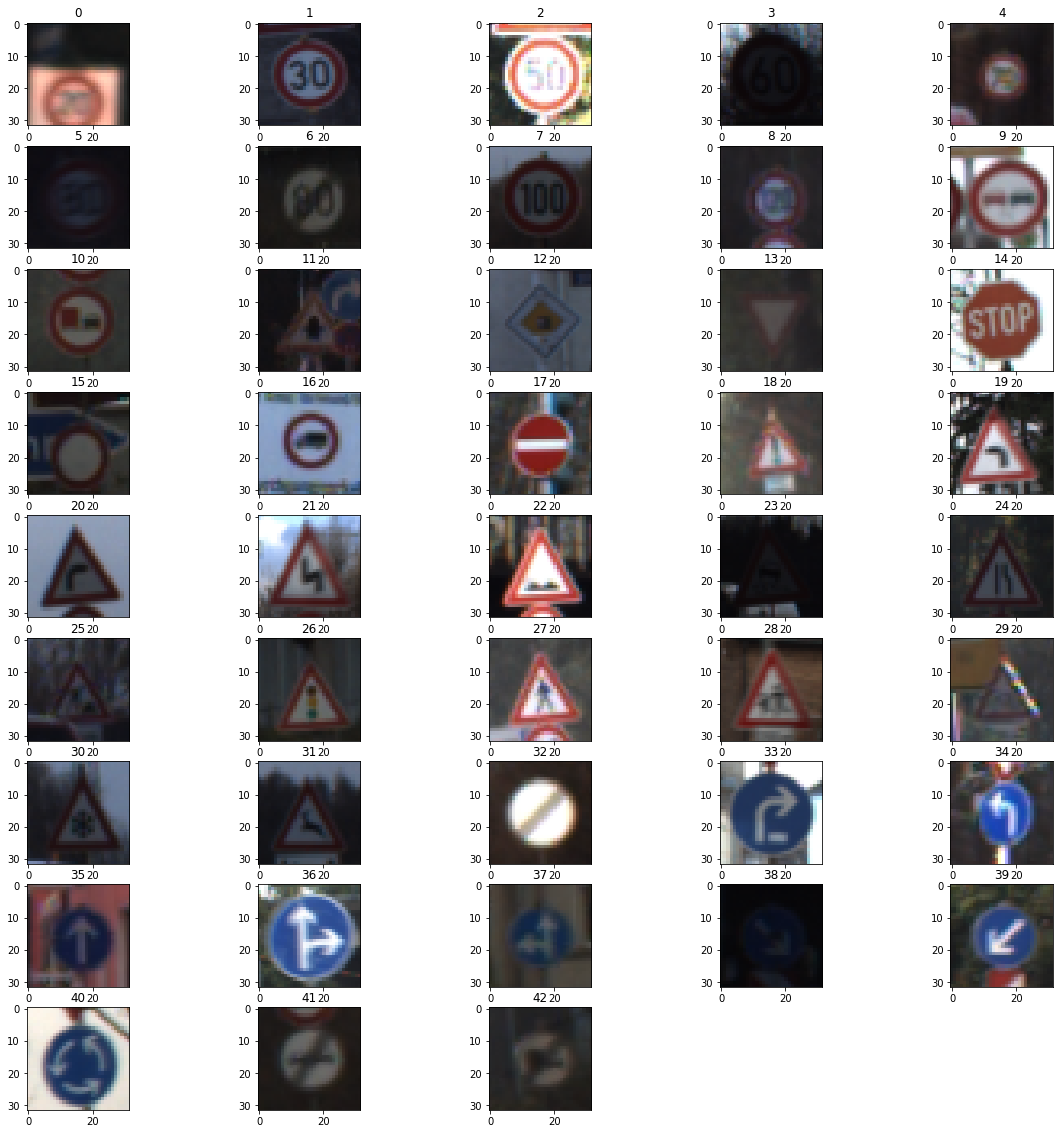

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook.
%matplotlib inline

# Configuring the size of the figures that will be displayed in the for loop
fig_size = plt.figure(figsize=(20, 20))

# For loop that goes through all the images provided
for image in range(0, n_classes):
    # Creating a variable where we are connecting the different names from the y_train to X_train
    X_named = X_train[y_train == image]
    # Specifying how many images will be displayed per line
    plt.subplot(np.ceil(n_classes / 5), 5, image + 1)
    # A random picture from the entire set of the pictures of one sign will be selected to be displayed
    index = np.random.randint(0, len(X_named))
    # Showing the image of that was selected randomly
    plt.imshow(X_named[index])
    # Showing of the title tagged to the picture
    plt.title(image)

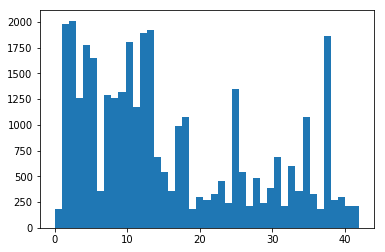

Number in each class: [ 30 240 240 150 210 210  60 150 150 150 210 150 210 240  90  90  60 120
 120  30  60  60  60  60  30 150  60  30  60  30  60  90  30  90  60 120
  60  30 210  30  60  30  30]


In [5]:
# Creating a histogram to have a visual aid of how many samples each sign has
plt.hist(y_train, n_classes)
plt.show()
print('Number in each class:', np.bincount(y_valid))

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

X_train RGB shape: (34799, 32, 32, 3)
X_valid RGB shape: (4410, 32, 32, 3)
X_test RGB shape: (12630, 32, 32, 3)
X_train Gray shape: (34799, 32, 32, 1)
X_valid Gray shape: (4410, 32, 32, 1)
X_test Gray shape: (12630, 32, 32, 1)


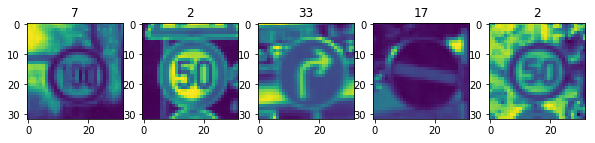

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from skimage.transform import rotate
from sklearn.utils import shuffle
import cv2

# Grayscaling function:
def grayscale(image):
    return np.sum(image/3, axis=3, keepdims=3)

print('X_train RGB shape:', X_train.shape)
print('X_valid RGB shape:', X_valid.shape)
print('X_test RGB shape:', X_test.shape)

gray_X_train = grayscale(X_train)
gray_X_valid = grayscale(X_valid)
gray_X_test = grayscale(X_test)

fig, axes = plt.subplots(1, 5, figsize=(10, 10))

for i in range(5):
    index = random.randint(0, len(X_train))
    image = gray_X_train[index].squeeze()
    axes[i].imshow(image)
    axes[i].set_title(y_train[index])

X_train = gray_X_train
X_valid = gray_X_valid
X_test = gray_X_test

print('X_train Gray shape:', gray_X_train.shape)
print('X_valid Gray shape:', gray_X_valid.shape)
print('X_test Gray shape:', gray_X_test.shape)

X_train pictures type: float64
X_valid pictures type: float64
X_test pictures type: float64


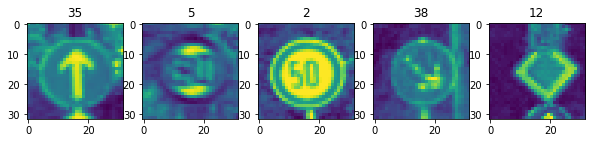

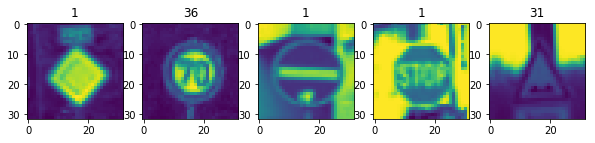

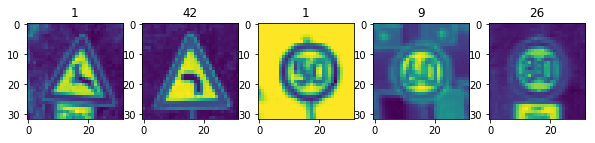

In [7]:
# Normailizing the data
def normalizer(images):
    normalized = np.zeros(shape = images.shape, dtype=np.float32)
    return (images - 128.0) / 128.0

X_train_normalized = np.asarray(normalizer(gray_X_train))
X_valid_normalized = np.asarray(normalizer(gray_X_valid))
X_test_normalized = np.asarray(normalizer(gray_X_test))

fig, axes = plt.subplots(1, 5, figsize=(10, 10))

for i in range(5):
    index = random.randint(0, len(X_train))
    image = X_train_normalized[index].squeeze()
    axes[i].imshow(image)
    axes[i].set_title(y_train[index])
    
fig, axes = plt.subplots(1, 5, figsize=(10, 10))

for i in range(5):
    index = random.randint(0, len(X_valid))
    image = X_valid_normalized[index].squeeze()
    axes[i].imshow(image)
    axes[i].set_title(y_train[index])
    
fig, axes = plt.subplots(1, 5, figsize=(10, 10))

for i in range(5):
    index = random.randint(0, len(X_test))
    image = X_test_normalized[index].squeeze()
    axes[i].imshow(image)
    axes[i].set_title(y_train[index])
    
print('X_train pictures type:', X_train_normalized.dtype)
print('X_valid pictures type:', X_valid_normalized.dtype)
print('X_test pictures type:', X_test_normalized.dtype)

In [8]:
# Testing the mean of the data after normalization

print('X_train_normalized mean:', np.mean(X_train_normalized))
print('X_valid_normalized mean:', np.mean(X_valid_normalized))
print('X_test_normalized mean:', np.mean(X_test_normalized))

# X_train = X_train_normalized
# X_valid = X_valid_normalized
# X_test = X_test_normalized

X_train_normalized mean: -0.354081335648
X_valid_normalized mean: -0.347215411128
X_test_normalized mean: -0.358215153428


In [9]:
# Function that brightens the pictures. Function extracted from:
# https://medium.com/@vivek.yadav/improved-performance-of-deep-learning-neural-network-models-on-traffic-sign-classification-using-6355346da2dc

def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    image1 = np.array(image1, dtype = np.float64)
    random_bright = .5+np.random.uniform()
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1[:,:,2][image1[:,:,2]>255]  = 255
    image1 = np.array(image1, dtype = np.uint8)
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

print('Augment brightness function ready!')

Augment brightness function ready!


In [10]:
# Function that transforms the pictures. Function extracted from:
# https://medium.com/@vivek.yadav/improved-performance-of-deep-learning-neural-network-models-on-traffic-sign-classification-using-6355346da2dc

def transform_image(image,ang_range,shear_range,trans_range):
    
    # Rotation
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows, cols, ch = image.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)
    
    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    
    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])
    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    image = cv2.warpAffine(image,Rot_M,(cols,rows))
    image = cv2.warpAffine(image,Trans_M,(cols,rows))
    image = cv2.warpAffine(image,shear_M,(cols,rows))
    
    #Brightness augmentation
    image = augment_brightness_camera_images(image)
    
    # Preprocessing 
    image = pre_process_image(image)
    
    return image

print('Transforms function ready!')

Transforms function ready!


X_train shape: (34799, 32, 32, 1)
y_train shape: (34799,)
X_train_normalized shape: (46480, 32, 32, 1)
y_train shape: (46480,)


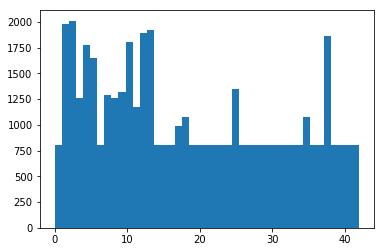

In [11]:
print('X_train shape:', X_train_normalized.shape)
print('y_train shape:', y_train.shape)

input_index = []
output_index = []

for new_class in range(n_classes):
    class_index = np.where(y_train == new_class)
    n_samples = len(class_index[0])
    if n_samples < 800:
        for i in range(800 - n_samples):
            input_index.append(class_index[0][i % n_samples])
            output_index.append(X_train_normalized.shape[0])
            new_image = X_train_normalized[class_index[0][i % n_samples]]
            X_train_normalized = np.concatenate((X_train_normalized, [new_image]), axis=0)
            y_train = np.concatenate((y_train, [new_class]), axis=0)
            
print('X_train_normalized shape:', X_train_normalized.shape)
print('y_train shape:', y_train.shape)

# Instagram with new number of classes
%matplotlib inline
plt.hist(y_train, n_classes)
plt.show()

In [12]:
# Shuffling the data to prevent biased results
X_train_normalized, y_train = shuffle(X_train_normalized, y_train)

print('Data shuffled!')
print("Number of training examples =", len(X_train_normalized))
print("Number of testing examples =", len(X_test))
print("Number of validation examples =", len(X_valid))

Data shuffled!
Number of training examples = 46480
Number of testing examples = 12630
Number of validation examples = 4410


In [13]:
# Split validation dataset from training dataset

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train_normalized, y_train, test_size=0.20, random_state=42)

print("Old X_train size:",len(X_train_normalized))
print("New X_train size:",len(X_train))
print("X_validation size:",len(X_valid))

Old X_train size: 46480
New X_train size: 37184
X_validation size: 9296


# Model Architecture

In [14]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def model(x):
    
    # Convolutional Layer 1
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean=0, stddev=0.1))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    
    # Drop Out 1
    drop_out1 = tf.nn.dropout(conv1, keep_prob)
    print("CL1 shape:", drop_out1.get_shape())
    
    # Convolutional Layer 2
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean=0, stddev=0.1))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(drop_out1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Drop Out 2
    drop_out2 = tf.nn.dropout(conv2, keep_prob)
    print("CL2 shape:", drop_out2.get_shape())
    
    # Convolutional Layer 3
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean=0, stddev=0.1))
    conv3_b = tf.Variable(tf.zeros(400))
    conv3 = tf.nn.conv2d(drop_out2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    conv3 = tf.nn.relu(conv3)
    
    # Drop Out 3
    drop_out3 = tf.nn.dropout(conv3, keep_prob)
    print("CL3 shape:", drop_out3.get_shape())
    
    # Flatten the convolutional layer to create fully connected layer 1
    flatten1 = flatten(drop_out2)
    print("Flatten1 shape:", flatten1.get_shape())
    
    # Flatten the convolutional layer to create fully connected layer 2
    flatten0 = flatten(drop_out3)
    print("Flatten2 shape:", flatten1.get_shape())
    
    # Concatonating both Flatten layers 1 & 2
    flatten0concat = tf.concat([flatten0, flatten1], 1)
    print("FlattenConcat shape:", flatten0concat.get_shape())
    
    # Drop Out 4
    drop_out4 = tf.nn.dropout(flatten0concat, keep_prob)
    print("layer 1 shape:", drop_out4.get_shape())
    
    # Fully Connected Layer 1
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 400), mean=0, stddev=0.1))
    fc1_b = tf.Variable(tf.zeros(400))
    fc1 = tf.matmul(drop_out4, fc1_W) + fc1_b
    fc1 = tf.nn.relu(fc1)
    
    # Dropout 5
    drop_out5 = tf.nn.dropout(fc1, keep_prob)
    print("FCL1 shape:", drop_out5.get_shape())
    
    # Fully Connected Layer 2
    fc2_W = tf.Variable(tf.truncated_normal(shape=(400, 200), mean=0, stddev=0.1))
    fc2_b = tf.Variable(tf.zeros(200))
    fc2 = tf.matmul(drop_out5, fc2_W) + fc2_b
    fc2 = tf.nn.relu(fc2)
    
    # Dropout 6
    drop_out6 = tf.nn.dropout(fc2, keep_prob)
    print("FCL2 shape:", drop_out6.get_shape())
    
    # Fully Connected Layer 3
    fc3_W = tf.Variable(tf.truncated_normal(shape=(200, 43), mean=0, stddev=0.1))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(drop_out6, fc3_W) + fc3_b
    print("Logits shape:", logits.get_shape())
    
    return logits

print('Pipeline created!')

Pipeline created!


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [15]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

import tensorflow as tf

# Features and Labels
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

# Parameters
rate = 0.001
epochs = 30
batch_size = 128

# Training Pipeline
logits = model(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

CL1 shape: (?, 14, 14, 6)
CL2 shape: (?, 5, 5, 16)
CL3 shape: (?, 1, 1, 400)
Flatten1 shape: (?, 400)
Flatten2 shape: (?, 400)
FlattenConcat shape: (?, 800)
layer 1 shape: (?, 800)
FCL1 shape: (?, 400)
FCL2 shape: (?, 200)
Logits shape: (?, 43)


In [16]:
# Evaluation of data set

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset: offset+batch_size], y_data[offset: offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [17]:
# Training data set

save_file = './lenet.ckpt'

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print('Training...')
    print()
    
    validation_accuracy_history = np.array([])
    
    for i in range(epochs):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, batch_size):
            end = offset + batch_size
            batch_x, batch_y = X_train[offset: end], y_train[offset: end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        training_accuracy = evaluate(X_train, y_train)
#         test_accuracy = evaluate(X_test, y_train)
        
        validation_accuracy_history = np.append(validation_accuracy_history, validation_accuracy)
    
        print('Epoch {} ...'.format(i+1))
        print('Validation Accuracy = {:.3f}'.format(validation_accuracy))
        print('Training Accuracy = {:.3f}'.format(training_accuracy))
#         print('Test Accuracy = {:.3f}'.format(test_accuracy))
        print()
        
    saver.save(sess, save_file)
    print('Model saved')

Training...

Epoch 1 ...
Validation Accuracy = 0.052
Training Accuracy = 0.054

Epoch 2 ...
Validation Accuracy = 0.141
Training Accuracy = 0.147

Epoch 3 ...
Validation Accuracy = 0.413
Training Accuracy = 0.424

Epoch 4 ...
Validation Accuracy = 0.594
Training Accuracy = 0.604

Epoch 5 ...
Validation Accuracy = 0.662
Training Accuracy = 0.664

Epoch 6 ...
Validation Accuracy = 0.694
Training Accuracy = 0.697

Epoch 7 ...
Validation Accuracy = 0.772
Training Accuracy = 0.772

Epoch 8 ...
Validation Accuracy = 0.808
Training Accuracy = 0.806

Epoch 9 ...
Validation Accuracy = 0.805
Training Accuracy = 0.802

Epoch 10 ...
Validation Accuracy = 0.849
Training Accuracy = 0.847

Epoch 11 ...
Validation Accuracy = 0.852
Training Accuracy = 0.849

Epoch 12 ...
Validation Accuracy = 0.869
Training Accuracy = 0.866

Epoch 13 ...
Validation Accuracy = 0.862
Training Accuracy = 0.861

Epoch 14 ...
Validation Accuracy = 0.904
Training Accuracy = 0.904

Epoch 15 ...
Validation Accuracy = 0.877
Tra

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [18]:
with tf.Session() as sess:
    saver.restore(sess, save_file)

    validation_accuracy = evaluate(X_valid, y_valid)
    train_accuracy = evaluate(X_train, y_train)
    test_accuracy = evaluate(X_test, y_test)
    print("Validation_accuracy Accuracy = {:.3f}".format(validation_accuracy))
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet.ckpt
Validation_accuracy Accuracy = 0.939
Train Accuracy = 0.942
Test Accuracy = 0.814


### Load and Output the Images

['Bicycles.jpg', 'Bumpy Road.jpg', 'Double Curve.jpg', 'Right Lane Ends.jpg', 'Stop.jpg', 'Straigh Ahead.jpg']


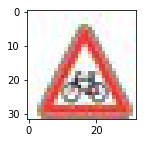

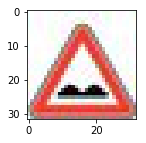

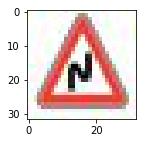

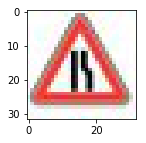

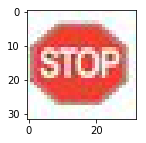

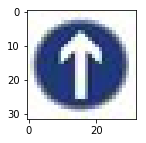

In [36]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
from PIL import Image

image_dir = os.listdir('./personal-traffic-signs-data')
print(image_dir)

X_personal_train = np.array([], dtype='float32')
y_personal_train = np.array([29, 22, 21, 39, 14, 35])

# Showing the new pictures
for i, image in enumerate(image_dir):
    new_image = Image.open('./personal-traffic-signs-data/' + image)
    new_image.load()
    new_image_array = np.asarray(new_image)
    plt.figure(figsize=(2, 2))
    plt.imshow(new_image_array)
    plt.show()
    X_personal_train = np.append(X_personal_train, new_image_array) 

X_personal_train = np.reshape(X_personal_train, [6, 32, 32, 3])
# for i in range(0, len(image_dir)):
#     X_personal_train[i] = cv2.imread('./personal-traffic-signs-data/' + image_dir[i])
#     X_personal_train[i] = cv2.cvtColor(X_personal_train[i], cv2.COLOR_BGR2RGB)
#     image = X_personal_train[i].squeeze()

#     plt.figure(figsize=(2, 2))
#     plt.imshow(image)



### Predict the Sign Type for Each Image

In [37]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# Grayscaling data
X_personal_train = grayscale(X_personal_train)

# Normalizing data
X_personal_train = normalizer(X_personal_train)

print(X_personal_train.shape)

(6, 32, 32, 1)


In [38]:
with tf.Session() as sess:
    saver.restore(sess, save_file)
    
    prediction = sess.run(tf.argmax(logits, 1), feed_dict={x: X_personal_train, keep_prob: 0.5})
    print(prediction)

INFO:tensorflow:Restoring parameters from ./lenet.ckpt
[30 20 28 24 14 35]


### Analyze Performance

In [39]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess, save_file)
    
    test_accuracy = evaluate(X_personal_train, y_personal_train)
    print('Test Accuracy = {:.3f}'.format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet.ckpt
Test Accuracy = 0.500


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [42]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

keep_prob = 0.5
predicted_labels = tf.nn.softmax(logits)

# with tf.Session() as sess:
#     saver.restore(sess, save_file)
    
#     output = sess.run(logits, feed_dict={x: X_personal_train})
#     final_output = sess.run(tf.nn.softmax(output))
    
#     values, indices = tf.nn.top_k(final_output, k=5)
#     probabilities = sess.run(values)
#     predictions = sess.run(indices)
    
#     np.set_printoptions(formatter={'float': lambda probs: "{0:0.7f}".format(probs)})    
#     print("Softmax probabilties for top 5 predictions are:")
#     print(probs)
#     print()
#     print("Top 5 predictions are:")
#     print(predictions)
#     print()
#     true_labels=np.array([17,27,33,22,5])
#     print("Actual Labels are:", true_labels)

with tf.Session() as sess:
    saver.restore(sess, save_file)
    
    output = sess.run(predicted_labels, feed_dict={x: X_personal_train, keep_prob: keep_prob})
    final_output = sess.run(tf.nn.top_k(output, k=5))
    
    print(final_output)

INFO:tensorflow:Restoring parameters from ./lenet.ckpt


TypeError: Cannot interpret feed_dict key as Tensor: Can not convert a float into a Tensor.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")